In [2]:
import getpass
import os

## API Key can be found by going to NVIDIA NGC -> AI Foundation Models -> (some model) -> Get API Code or similar.
## 10K free queries to any endpoint (which is a lot actually).

# del os.environ['NVIDIA_API_KEY']  ## delete key and reset
if os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    print("Valid NVIDIA_API_KEY already in environment. Delete to reset")
else:
    nvapi_key = getpass.getpass("NVAPI Key (starts with nvapi-): ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

NVAPI Key (starts with nvapi-):  ······································································


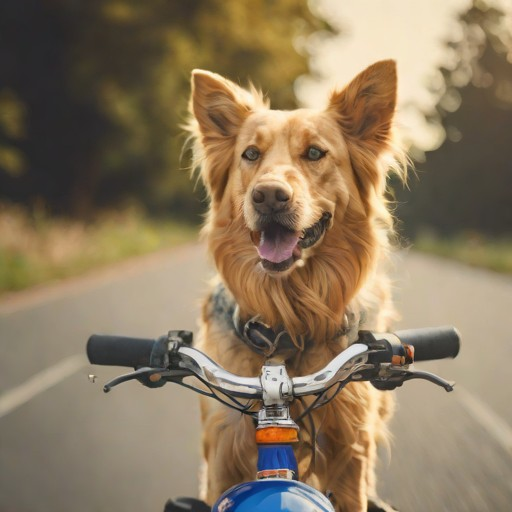

In [9]:
import base64
from io import BytesIO
from PIL import Image
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_core.output_parsers import StrOutputParser

img_gen = ChatNVIDIA(model="ai-sdxl-turbo")

def to_sdxl_payload(d):
    if d:
        d = {"text_prompts": [{
            "text": d.get("messages", [{}])[0].get("content"),
            "weight": 1,
            }]}
        d["steps"] = 4  ## why not add another argument?

    return d


img_gen.client.payload_fn = to_sdxl_payload

def get_first_artifact(d):
    return d.response_metadata["artifacts"][0]["base64"]

def to_pil_img(d):
    return Image.open(BytesIO(base64.b64decode(d)))

(img_gen | get_first_artifact | StrOutputParser() | to_pil_img).invoke("a dog rides with high photo-quality")